# WeatherPy
----

In [1]:
# Dependencies and Setup
import json
import requests
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_key import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/city_data.csv"

# Range of latitude and longitude
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

665

In [3]:
city_names = []
lat = []
long = []
maxtemp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_counter = 1
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
#         date.append(response["dt"])

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_names.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date = datetime.datetime.fromtimestamp(int(response['dt'])).strftime('%m-%d-%Y')
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        if city_counter > 49:
            city_counter = 0
            set_counter = set_counter + 1
    
        else:
            city_counter = city_counter + 1
            
        print(f"Processing Record {city_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 2 of Set 1 : kapoeta
Processing Record 3 of Set 1 : pevek
Processing Record 4 of Set 1 : bontang
Processing Record 5 of Set 1 : hilo
Processing Record 6 of Set 1 : tomatlan
Processing Record 7 of Set 1 : solnechnyy
Processing Record 8 of Set 1 : saint anthony
Processing Record 9 of Set 1 : kavaratti
Processing Record 10 of Set 1 : ushuaia
Processing Record 11 of Set 1 : byron bay
Processing Record 12 of Set 1 : meyzieu
Processing Record 13 of Set 1 : albany
Processing Record 14 of Set 1 : kon tum
Processing Record 15 of Set 1 : qandala
Processing Record 16 of Set 1 : butaritari
Processing Record 17 of Set 1 : hobart
Processing Record 18 of Set 1 : samfya
Processing Record 19 of Set 1 : mwinilunga
Processing Record 20 of Set 1 : aripuana
City not found. Skipping...
Processing Record 21 of Set 1 : shubarshi
Processing Record 22 of Set 1 : fairbanks
Processing Record 23 of Set 1 : fukue
Processing Record 24 of Set 1

Processing Record 37 of Set 4 : chinhoyi
Processing Record 38 of Set 4 : fuling
Processing Record 39 of Set 4 : nikolskoye
Processing Record 40 of Set 4 : marshall
Processing Record 41 of Set 4 : takoradi
Processing Record 42 of Set 4 : valverde del camino
Processing Record 43 of Set 4 : catemaco
Processing Record 44 of Set 4 : nohar
Processing Record 45 of Set 4 : yumen
City not found. Skipping...
Processing Record 46 of Set 4 : murgab
Processing Record 47 of Set 4 : noyabrsk
Processing Record 48 of Set 4 : henties bay
City not found. Skipping...
Processing Record 49 of Set 4 : lavrentiya
Processing Record 50 of Set 4 : saint-pierre
Processing Record 0 of Set 5 : mar del plata
Processing Record 1 of Set 5 : puro
Processing Record 2 of Set 5 : mubende
Processing Record 3 of Set 5 : leningradskiy
Processing Record 4 of Set 5 : cabedelo
Processing Record 5 of Set 5 : tsiroanomandidy
Processing Record 6 of Set 5 : ust-ishim
Processing Record 7 of Set 5 : aswan
Processing Record 8 of Set 5

Processing Record 20 of Set 8 : ancud
Processing Record 21 of Set 8 : leh
Processing Record 22 of Set 8 : khor
Processing Record 23 of Set 8 : ilulissat
Processing Record 24 of Set 8 : gouyave
City not found. Skipping...
Processing Record 25 of Set 8 : nalut
Processing Record 26 of Set 8 : igrim
Processing Record 27 of Set 8 : tuy hoa
Processing Record 28 of Set 8 : deputatskiy
Processing Record 29 of Set 8 : pokrovsk
Processing Record 30 of Set 8 : hualmay
Processing Record 31 of Set 8 : itarema
Processing Record 32 of Set 8 : edgewater
Processing Record 33 of Set 8 : wanlaweyn
Processing Record 34 of Set 8 : karratha
Processing Record 35 of Set 8 : kahului
Processing Record 36 of Set 8 : husavik
Processing Record 37 of Set 8 : pa sang
Processing Record 38 of Set 8 : los llanos de aridane
Processing Record 39 of Set 8 : vostok
Processing Record 40 of Set 8 : bonoua
Processing Record 41 of Set 8 : larsnes
Processing Record 42 of Set 8 : mayo
Processing Record 43 of Set 8 : petropavlovs

Processing Record 5 of Set 12 : honiara
Processing Record 6 of Set 12 : tucuman
Processing Record 7 of Set 12 : kurilsk
Processing Record 8 of Set 12 : lompoc
Processing Record 9 of Set 12 : mason city
Processing Record 10 of Set 12 : maarianhamina
Processing Record 11 of Set 12 : namakkal
Processing Record 12 of Set 12 : carutapera
Processing Record 13 of Set 12 : carambei
Processing Record 14 of Set 12 : batagay-alyta
Processing Record 15 of Set 12 : jiayuguan
Processing Record 16 of Set 12 : flin flon
Processing Record 17 of Set 12 : antofagasta
Processing Record 18 of Set 12 : kotelnich
Processing Record 19 of Set 12 : gushikawa
Processing Record 20 of Set 12 : inuvik
Processing Record 21 of Set 12 : mangan
Processing Record 22 of Set 12 : tilichiki
Processing Record 23 of Set 12 : zharkent
Processing Record 24 of Set 12 : orange cove
Processing Record 25 of Set 12 : sao jose da coroa grande
Processing Record 26 of Set 12 : sibolga
Processing Record 27 of Set 12 : nelson bay
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Put the data into a dataframe
city_data_df = pd.DataFrame({
    "City": city_names,
    "Lat": lat,
    "Lng": long,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})

# Display the DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapoeta,4.7717,33.5903,85.68,45,100,11.83,SS,05-19-2021
1,Pevek,69.7008,170.3133,21.09,89,39,8.61,RU,05-19-2021
2,Bontang,0.1333,117.5000,78.01,90,100,7.43,ID,05-19-2021
3,Hilo,19.7297,-155.0900,70.79,86,90,10.36,US,05-19-2021
4,Tomatlán,19.9333,-105.2500,73.92,65,0,2.44,MX,05-19-2021


In [6]:
# How many entries were returned?
city_data_df.count()

City          618
Lat           618
Lng           618
Max Temp      618
Humidity      618
Cloudiness    618
Wind Speed    618
Country       618
Date          618
dtype: int64

In [7]:
# Inspect the data by using the describe function
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,20.724410,23.391745,67.319693,67.252427,60.402913,8.178673
std,32.646091,88.214528,18.100439,22.259142,37.595749,5.500510
min,-54.800000,-175.200000,17.830000,5.000000,0.000000,0.000000
25%,-6.080825,-52.841425,55.402500,56.000000,20.250000,3.985000
50%,25.979000,27.976850,70.025000,71.000000,75.000000,7.010000
75%,48.536225,100.207800,80.490000,84.000000,99.000000,11.500000
max,78.218600,179.316700,116.440000,100.000000,100.000000,28.770000


In [8]:
# Export the city data into a csv file
city_data_df.to_csv("../output_data/city_data.csv", index=False)

In [9]:
# Show Record Count
countforme = len(city_data_df)
countforme

618

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# Calculate latest date (max) for plot titles
tstamp = city_data_df.Date.max()
tstamp

'05-19-2021'

#### Latitude vs. Temperature Plot

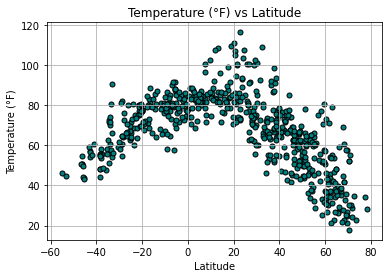

In [11]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title("Temperature (°F) vs Latitude")

plt.savefig("../images/tempvlat.png")

# As latitude approaches 0, i.e. the equator, temperature increases

#### Latitude vs. Humidity Plot

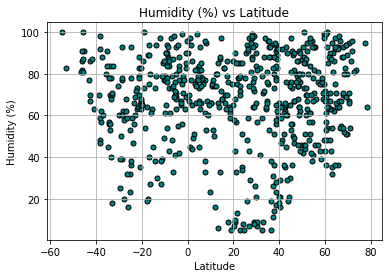

In [12]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs Latitude")

plt.savefig("../images/humvlat.png")

# There seems to be no relationship between humidity and latitude

#### Latitude vs. Cloudiness Plot

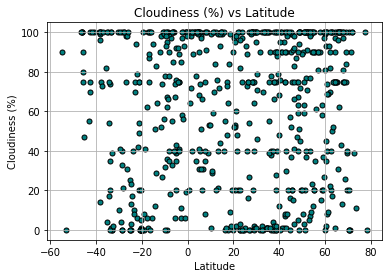

In [13]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs Latitude")

plt.savefig("../images/cloudvlat.png")

# There seems to be no relationship between cloudiness and latitude

#### Latitude vs. Wind Speed Plot

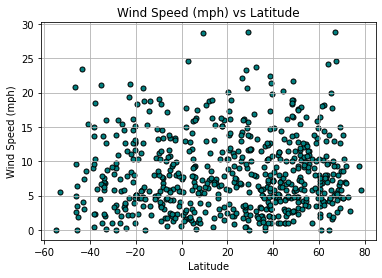

In [14]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs Latitude")

plt.savefig("../images/windvlat.png")

# There seems to be no relationship between wind speed and latitude

## Linear Regression

In [15]:
# Locate cities above or equal to 0 latitude and below 0 latitude
northern_cities = city_data_df[city_data_df.loc[:, "Lat"] >= 0]
southern_cities = city_data_df[city_data_df.loc[:, "Lat"] < 0]

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northlat_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]
southlat_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

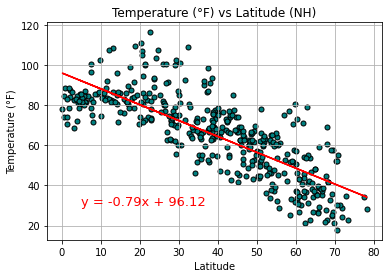

In [17]:
# Plot Temperature (°F) vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Lat"], northern_cities["Max Temp"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title("Temperature (°F) vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Lat"], northern_cities["Max Temp"])
regress_values = northern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(5,30), fontsize=13,color="red")
plt.plot(northern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/tempvlatnh.png")

In [18]:
print("The high r value indicates a strong positive correlation between latitude and max temperature.")

The high r value indicates a strong positive correlation between latitude and max temperature.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

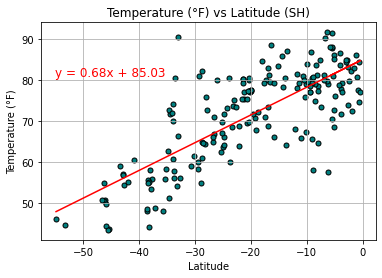

In [19]:
# Plot Temperature (°F) vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Lat"], southern_cities["Max Temp"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.title("Temperature (°F) vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Lat"], southern_cities["Max Temp"])
regress_values = southern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-55,81),fontsize=12,color="red")
plt.plot(southern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/tempvlatsh.png")

In [20]:
print("The high r value indicates a strong positive correlation between latitude and max temperature.")

The high r value indicates a strong positive correlation between latitude and max temperature.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

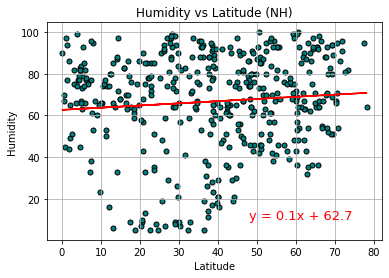

In [21]:
# Plot Humidity vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Lat"], northern_cities["Humidity"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Lat"], northern_cities["Humidity"])
regress_values = northern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(48,10),fontsize=13,color="red")
plt.plot(northern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/northernhumvlat.png")

In [22]:
print("The low r values indicate a weak to no relationship between humidity and latitude.")

The low r values indicate a weak to no relationship between humidity and latitude.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

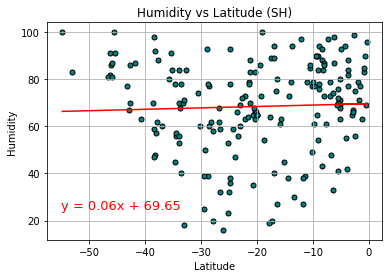

In [23]:
# Plot Humidity vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Lat"], southern_cities["Humidity"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Lat"], southern_cities["Humidity"])
regress_values = southern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-55,25), fontsize=13,color="red")
plt.plot(southern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/sourthernhumvlat.png")

In [24]:
print("The low r values indicate a weak to no relationship between humidity and latitude.")

The low r values indicate a weak to no relationship between humidity and latitude.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

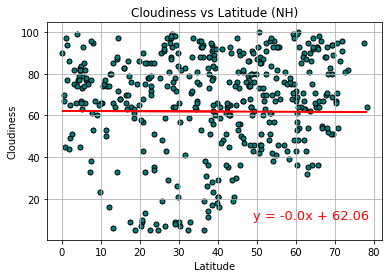

In [25]:
# Plot Cloudiness vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Lat"], northern_cities["Humidity"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Lat"], northern_cities["Cloudiness"])
regress_values = northern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(49,10), fontsize=13,color="red")
plt.plot(northern_cities["Lat"],regress_values,"r-")

plt.savefig("../images/northerncloudvlat.png")

In [26]:
print("The low r values indicate a weak positive relationship between latitude and cloudiness.")

The low r values indicate a weak positive relationship between latitude and cloudiness.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

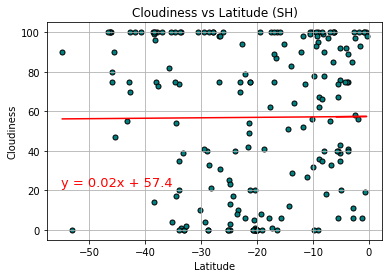

In [27]:
# Plot Cloudiness vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Lat"], southern_cities["Cloudiness"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Lat"], southern_cities["Cloudiness"])
regress_values = southern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-55,22),fontsize=13,color="red")
plt.plot(southern_cities["Lat"], regress_values,"r-")

plt.savefig('../images/southerncloudvlat')

In [28]:
print("The low r values indicate a weak positive relationship between latitude and cloudiness.")

The low r values indicate a weak positive relationship between latitude and cloudiness.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

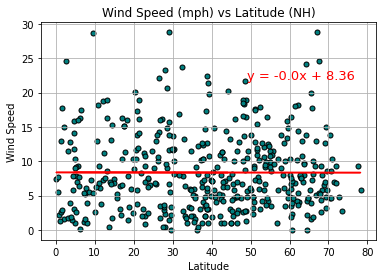

In [29]:
# Plot Wind Speed (mph) vs Latitude with linear regression for northern hemisphere
plt.scatter(northern_cities["Lat"], northern_cities["Wind Speed"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (mph) vs Latitude (NH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_cities["Lat"], northern_cities["Wind Speed"])
regress_values = northern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(49,22),fontsize=13,color="red")
plt.plot(northern_cities["Lat"], regress_values,"r-")

plt.savefig('../images/northernwindvlat')

In [30]:
print("The low r value indicates that there is no significant relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.")

The low r value indicates that there is no significant relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

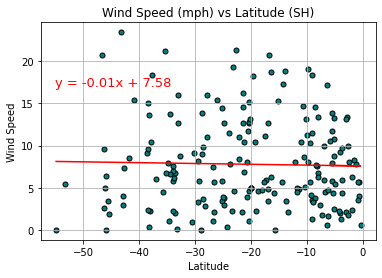

In [31]:
# Plot Wind Speed (mph) vs Latitude with linear regression for southern hemisphere
plt.scatter(southern_cities["Lat"], southern_cities["Wind Speed"], marker = "o", s = 25, facecolor = "teal", edgecolor="black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed (mph) vs Latitude (SH)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_cities["Lat"], southern_cities["Wind Speed"])
regress_values = southern_cities["Lat"] * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_equation,(-55,17),fontsize=13,color="red")
plt.plot(southern_cities["Lat"], regress_values,"r-")

plt.savefig('../images/southernwindvlat')

In [32]:
print("The low r value indicates that there is no significant relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.")

The low r value indicates that there is no significant relationship between wind speed and latitude. The difference between the hemispheres doesn't seem to be significant enough to comment upon.
